## Consumer Complaint Classification

Consumer Complaint Classification means classifying the nature of the complaint reported by the consumer. It is helpful for consumer care departments as they receive thousands of complaints daily, so classifying them helps identify complaints that need to be solved first to reduce the loss of the consumer.

**Information about columns**

* Date received: The date the complaint was received. This information can be used to analyze the intensity of complaints in certain periods.
* Product: The product category for which the complaint was made. This is the target variable of the model and helps us classify which products the complaints belong to.
* Sub-product: Sub-products belonging to the product category. This information allows us to perform more detailed analysis.
* Issue: The main issue the consumer complains about. This helps us understand the main problems users face.
* Sub-issue: More specific problems related to the main issue. This allows complaints to be detailed.
* Consumer complaint narrative: Text where the consumer explains the complaint in detail. This text can be processed with natural language processing techniques using it as input data for the model.

This project aims to effectively classify and analyze consumer complaints using the above columns. In particular, the text data in the Consumer complaint narrative column will play an important role in the learning process of the model and will allow the content of the complaints to be understood. In this way, it will be possible to better understand the problems encountered by users and develop solution suggestions.

<img src='ccc.png' width=550 >

## Import Libraries

In [1]:
#pip install nltk

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv('consumercomplaints.csv',nrows=400000)
#Read the file.(Since our data is large, we read the first 400,000 rows.)

## EDA - Exploratory Data Analysis

In [13]:
df.head()

,Unnamed: 0,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative
0,0,2022-11-11,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN
1,1,2022-11-23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN
2,2,2022-11-16,Mortgage,VA mortgage,Trouble during payment process,NaN,NaN
3,3,2022-11-15,Checking or savings account,Checking account,Managing an account,Fee problem,"Hi, I have been banking with Wells Fargo for o..."
4,4,2022-11-07,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN


In [14]:
df.shape

(400000, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Unnamed: 0                    400000 non-null  int64 
 1   Date received                 400000 non-null  object
 2   Product                       400000 non-null  object
 3   Sub-product                   397175 non-null  object
 4   Issue                         400000 non-null  object
 5   Sub-issue                     370930 non-null  object
 6   Consumer complaint narrative  140392 non-null  object
dtypes: int64(1), object(6)
memory usage: 21.4+ MB


In [16]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
df.isnull().sum()

,0
Date received,0
Product,0
Sub-product,2825
Issue,0
Sub-issue,29070
Consumer complaint narrative,259608


In [18]:
df=df.dropna()

## Data Visualization

In [19]:
df['Product'].value_counts()

,count
Product,
"Credit reporting, credit repair services, or other personal consumer reports",89596
Debt collection,15089
Credit card or prepaid card,9522
Checking or savings account,7613
Vehicle loan or lease,2083
Student loan,2022
"Payday loan, title loan, or personal loan",123


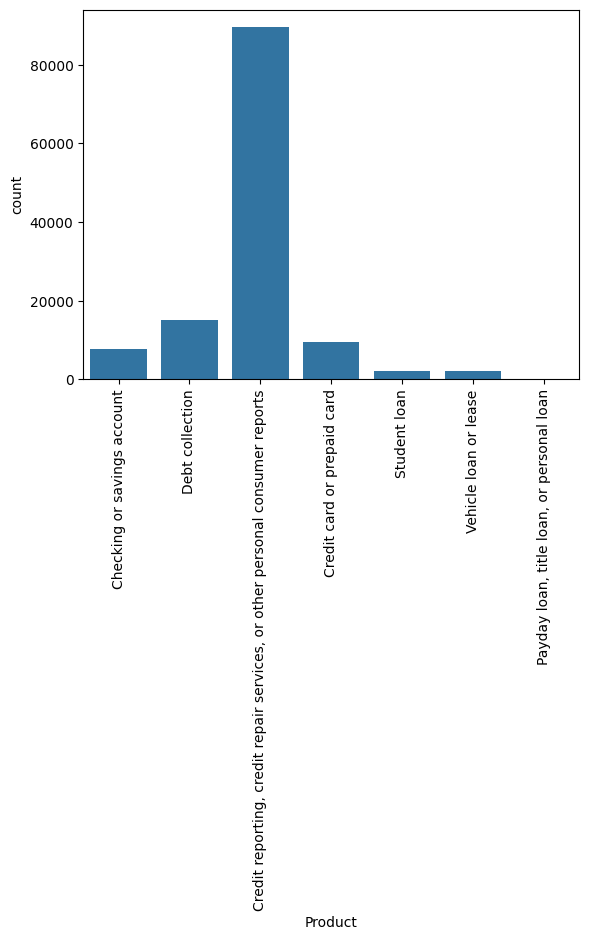

In [20]:
sns.countplot(x=df['Product'])
plt.xticks(rotation=90);

In [21]:
df['Sub-product'].value_counts()

,count
Sub-product,
Credit reporting,88696
General-purpose credit card or charge card,7426
Checking account,6308
Other debt,3990
Credit card debt,3428
I do not know,3255
Medical debt,2167
Loan,1711
Store credit card,1420


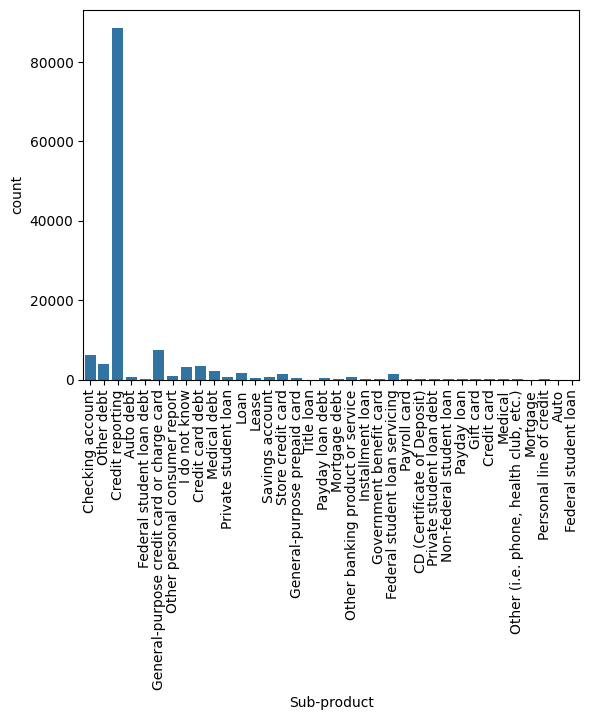

In [22]:
sns.countplot(x=df['Sub-product'])
plt.xticks(rotation=90);

In [23]:
df['Consumer complaint narrative']=df['Consumer complaint narrative'].str.lower()
df['Consumer complaint narrative']=df['Consumer complaint narrative'].str.replace("[^\w\s]" , "",regex=True)
df['Consumer complaint narrative']=df['Consumer complaint narrative'].str.replace('[\n]', '',regex=True)
df['Consumer complaint narrative']=df['Consumer complaint narrative'].str.replace('\d+','',regex=True)
df['Consumer complaint narrative']=df['Consumer complaint narrative'].str.replace('\r',' ')

In [24]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Count Vectorization

In [26]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from textblob import TextBlob

In [27]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [28]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [29]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

## Modelling

In [30]:
x=np.array(df["Consumer complaint narrative"])
y=np.array(df["Product"])

In [31]:
x=vect.fit_transform(x)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [33]:
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=42,test_size=.20)

In [34]:
l=LogisticRegression()
model=l.fit(x_train,y_train)
lpred=l.predict(x_test)
accuracy_score(lpred,y_test)

0.8854819516065053

In [35]:
print(classification_report(lpred, y_test))

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.82      0.84      0.83      1425
                                                 Credit card or prepaid card       0.71      0.80      0.75      1689
Credit reporting, credit repair services, or other personal consumer reports       0.97      0.91      0.94     19100
                                                             Debt collection       0.63      0.80      0.70      2414
                                   Payday loan, title loan, or personal loan       0.00      0.00      0.00         0
                                                                Student loan       0.67      0.90      0.77       317
                                                       Vehicle loan or lease       0.45      0.71      0.55       265

                                                      

In [36]:
confusion_matrix(lpred, y_test)

array([[ 1196,   148,    32,    28,     0,    11,    10],
       [  138,  1357,   112,    60,     1,     5,    16],
       [   88,   343, 17376,  1018,    25,    94,   156],
       [   28,    65,   320,  1921,     6,    32,    42],
       [    0,     0,     0,     0,     0,     0,     0],
       [    0,     1,    16,    11,     0,   286,     3],
       [    4,    10,    42,    19,     1,     2,   187]])

<Axes: >

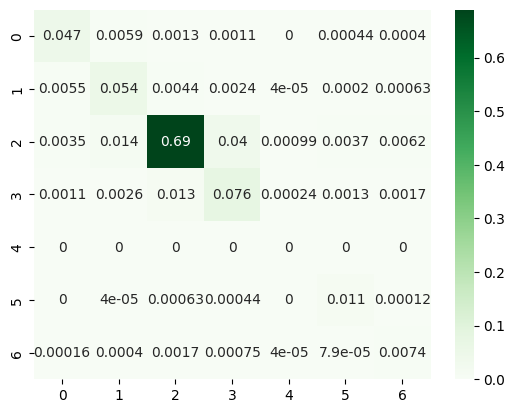

In [37]:
cm = confusion_matrix(lpred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Greens')

In [38]:
#K-Fold Cross Validation (with Random Forest Classifier)
x=np.array(df["Consumer complaint narrative"])
y=np.array(df["Product"])
x=vect.fit_transform(x)

model=RandomForestClassifier()

#K-fold cross validation (K=5)
kf=KFold(n_splits=5, shuffle=True, random_state=42)

#Calculating cross validation results
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

#Average of results
print(f"Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")

Accuracy Scores: [0.87397858 0.87362158 0.87528758 0.87377524 0.87556032]
Mean Accuracy: 0.8744446595442664


In [39]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test(x, y):

    lr = LogisticRegression(max_iter=1000)
    b = BernoulliNB()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    abc = AdaBoostClassifier()
    gbc = GradientBoostingClassifier()
    svc = SVC()
    mlp = MLPClassifier(max_iter=1000)

    algos = [lr,  b,  knn, dt, rf, abc, gbc, svc, mlp]
    algo_names = ['Logistic Regression', 'BernoulliNB', 'K-Nearest Neighbors',
                  'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'SVM', 'MLP Classifier']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []


    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score'], index=algo_names)

    for algo in algos:
        algo.fit(x_train, y_train)
        y_pred = algo.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average='weighted'))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))

    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1-score'] = f1


    rtable = result.sort_values('Accuracy', ascending=False)
    return rtable


In [40]:
algo_test(x, y)

,Accuracy,Precision,Recall,F1-score
MLP Classifier,0.898612,0.896470,0.898612,0.897105
Gradient Boosting,0.887386,0.881857,0.887386,0.882239
Logistic Regression,0.885680,0.880266,0.885680,0.881951
SVM,0.879294,0.872936,0.879294,0.871307
Random Forest,0.873503,0.868487,0.873503,0.858753
Decision Tree,0.845458,0.842001,0.845458,0.843579
AdaBoost,0.838794,0.829475,0.838794,0.831483
K-Nearest Neighbors,0.815073,0.796177,0.815073,0.792309
BernoulliNB,0.785998,0.797538,0.785998,0.790603


## Summary

This project is considered as a consumer complaint classification problem and aims to understand the problems faced by users. The dataset contains various columns containing the details of consumer complaints; these include the date the complaint was received, product category, sub-product, main problem, sub-problem and the text describing the consumer complaint. The target variable is the "Product" column, which indicates the product category to which the complaint belongs.

Within the scope of the project, firstly the data was cleaned and made suitable for modeling. Then, the text data in the Consumer complaint narrative column was processed using natural language processing techniques. Classification algorithms such as logistic regression, decision trees and random forests were applied and the performance of the model was evaluated with metrics such as accuracy, F1 score, precision, recall. In addition, the reliability of the results was increased by applying K-fold cross-validation. MLP Classifier became the most successful model of the project by obtaining the best accuracy score.We did not apply deep learning because our success rate was good and we completed our project.

This study aims to provide important information to businesses in the field of increasing customer satisfaction and product development by providing a more effective classification of consumer complaints.